**Проект: использование средств Python для расчёта и визуализации статистических свойств выборки**

Выборка — задача многоклассовой классификации [ирисов Фишера](https://).

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
import seaborn as sns
from scipy import stats
from pprint import pprint

In [76]:
iris = datasets.load_iris()

In [77]:
dataset = iris['data']

In [78]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [79]:
target = iris['target']

In [80]:
iris_data = pd.DataFrame(np.c_[dataset, target], columns=iris['feature_names'] + ['species'])

In [81]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [82]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 1. Построим гистограмму распределение признаков

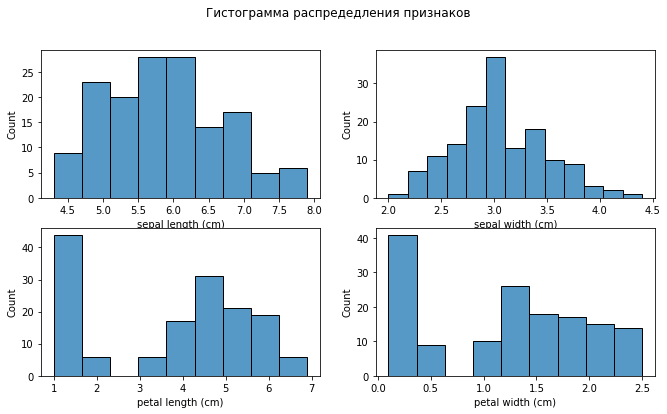

In [83]:
fig, axs = plt.subplots(2, 2, figsize=(11, 6))
fig.suptitle('Гистограмма распредедления признаков')

sns.histplot(ax=axs[0, 0], data=iris_data, x='sepal length (cm)')
sns.histplot(ax=axs[0, 1], data=iris_data, x='sepal width (cm)')
sns.histplot(ax=axs[1, 0], data=iris_data, x='petal length (cm)')
sns.histplot(ax=axs[1, 1], data=iris_data, x='petal width (cm)')
plt.show()

## 2. Построим гистограмму распределение признаков по видам

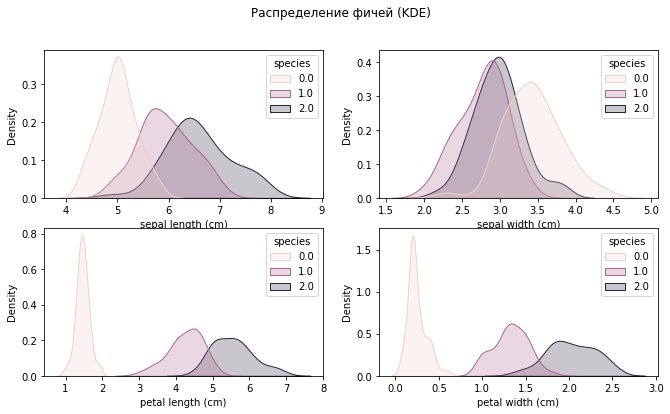

In [84]:
fig, axs = plt.subplots(2, 2, figsize=(11, 6))
fig.suptitle('Распределение фичей (KDE)')

sns.kdeplot(ax=axs[0, 0], data=iris_data, x='sepal length (cm)', hue='species', fill=True)
sns.kdeplot(ax=axs[0, 1], data=iris_data, x='sepal width (cm)', hue='species', fill=True)
sns.kdeplot(ax=axs[1, 0], data=iris_data, x='petal length (cm)', hue='species', fill=True)
sns.kdeplot(ax=axs[1, 1], data=iris_data, x='petal width (cm)', hue='species', fill=True)
plt.show()

## 3. Визуализируем матрицу корреляций

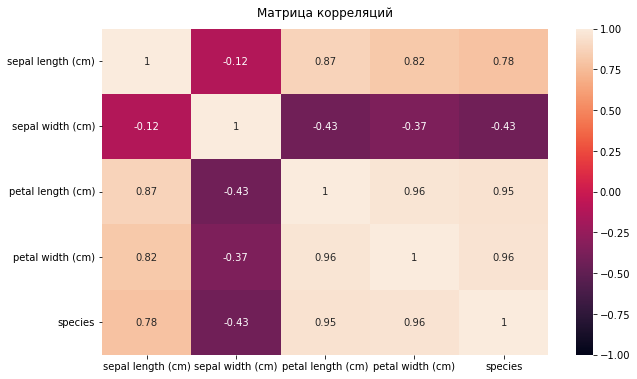

In [85]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(iris_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Матрица корреляций', fontdict={'fontsize':12}, pad=12 );

## 4. Проверка признаков 1 и 2 на нормальность

In [86]:
list(iris_data.columns)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'species']

## 1) sepal length (cm)

In [87]:
stat, p = stats.shapiro(iris_data['sepal length (cm)'])
print(f'Statistic: {stat:.4f}; Pvalue: {p:.4f}')

Statistic: 0.9761; Pvalue: 0.0102


In [88]:
alpha = 0.05

In [89]:
if p > alpha:
      print('Образец подчиняется распределиню Гаусса (подтверждение гипотезы H0)')
else:
    print('Образец не подчиняется распределиню Гаусса (опровержение гипотезы H0)')

Образец не подчиняется распределиню Гаусса (опровержение гипотезы H0)


## 2) sepal width (cm)

In [90]:
stat, p = stats.shapiro(iris_data['sepal width (cm)'])
print(f'Statistic: {stat:.4f}; Pvalue: {p:.4f}')

Statistic: 0.9849; Pvalue: 0.1011


In [91]:
if p > alpha:
    print('Образец подчиняется распределиню Гаусса (подтверждение гипотезы H0)')
else:
    print('Образец не подчиняется распределиню Гаусса (опровержение гипотезы H0)')

Образец подчиняется распределиню Гаусса (подтверждение гипотезы H0)


## 5. Расчёт статистик из пункта 1 для каждого значения таргета (группировка).

In [92]:
gr_sp = iris_data.groupby('species')

sp_dict = {
    'Class_0': {},
    'Class_1': {},
    'Class_2': {}
}

result = {}

for col in list(iris_data.columns)[:-1]:
    statistics = [gr_sp[col].mean(),
                  gr_sp[col].var(),
                  gr_sp[col].min(),
                  gr_sp[col].max(),
                  gr_sp[col].max() - gr_sp[col].min()]
    
    for i in range(len(gr_sp)):
        sp_dict[f'Class_{i}'][col] = []
        for stat in statistics:
            sp_dict[f'Class_{i}'][col].append(stat[i])

# pprint(sp_dict)

for data in sp_dict:
    result[data] = pd.DataFrame(sp_dict[data], columns=list(iris_data.columns)[:-1], index=['mean', 'D', 'min', 'max', 'range'])

In [93]:
print('<<< Class_0 >>>')
result['Class_0'].T

<<< Class_0 >>>


,mean,D,min,max,range
sepal length (cm),5.006,0.124249,4.3,5.8,1.5
sepal width (cm),3.428,0.143690,2.3,4.4,2.1
petal length (cm),1.462,0.030159,1.0,1.9,0.9
petal width (cm),0.246,0.011106,0.1,0.6,0.5


In [94]:
print('<<< Class_1 >>>')
result['Class_1'].T

<<< Class_1 >>>


,mean,D,min,max,range
sepal length (cm),5.936,0.266433,4.9,7.0,2.1
sepal width (cm),2.770,0.098469,2.0,3.4,1.4
petal length (cm),4.260,0.220816,3.0,5.1,2.1
petal width (cm),1.326,0.039106,1.0,1.8,0.8


In [95]:
print('<<< Class_2 >>>')
result['Class_2'].T

<<< Class_2 >>>


,mean,D,min,max,range
sepal length (cm),6.588,0.404343,4.9,7.9,3.0
sepal width (cm),2.974,0.104004,2.2,3.8,1.6
petal length (cm),5.552,0.304588,4.5,6.9,2.4
petal width (cm),2.026,0.075433,1.4,2.5,1.1


## 6. Написать функцию, автоматизирующую EDA.

In [96]:
def auto_eda(data):
    # Вывод датасета
    print(data.head())
    
    # Вывод статистических показателей (mean, D, min, max, range)
    iris_data.describe()
    
    # Построим гистограмму распределение признаков
    fig, axs = plt.subplots(2, 2, figsize=(11, 6))
    fig.suptitle('Distributions of features (histograms)')

    sns.histplot(ax=axs[0, 0], data=data, x='sepal length (cm)')
    sns.histplot(ax=axs[0, 1], data=data, x='sepal width (cm)')
    sns.histplot(ax=axs[1, 0], data=data, x='petal length (cm)')
    sns.histplot(ax=axs[1, 1], data=data, x='petal width (cm)')
    plt.show()
    
    # Построим гистограмму распределение признаков по видам (KDE)
    fig, axs = plt.subplots(2, 2, figsize=(11, 6))
    fig.suptitle('Distribution of features per species (KDE)')

    sns.kdeplot(ax=axs[0, 0], data=data, x='sepal length (cm)', hue='species', fill=True)
    sns.kdeplot(ax=axs[0, 1], data=data, x='sepal width (cm)', hue='species', fill=True)
    sns.kdeplot(ax=axs[1, 0], data=data, x='petal length (cm)', hue='species', fill=True)
    sns.kdeplot(ax=axs[1, 1], data=data, x='petal width (cm)', hue='species', fill=True)
    plt.show()
    
    # Постороение тепловой карты матрицы коррелиций
    corr = data.corr()
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(8, 4))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5},
                cbar=True, fmt='.2f', annot_kws={'size': 10}, annot=True)
    plt.show()
    
    # Проверка признаков 1 и 2 на нормальность
    ## 1) sepal length (cm)
    stat, p = stats.shapiro(data['sepal length (cm)'])
    print(f'Statistic: {stat:.4f}; Pvalue: {p:.4f}')
    
    alpha = 0.05
    
    if p > alpha:
    print('Образец подчиняется распределиню Гаусса (подтверждение гипотезы H0)')
else:
    print('Образец не подчиняется распределиню Гаусса (опровержение гипотезы H0)')
    
    ## 2) sepal width (cm)
    stat, p = stats.shapiro(data['sepal width (cm)'])
    print(f'\nStatistic: {stat:.4f}; Pvalue: {p:.4f}')
    
    if p > alpha:
    print('Образец подчиняется распределиню Гаусса (подтверждение гипотезы H0)')
else:
    print('Образец не подчиняется распределиню Гаусса (опровержение гипотезы H0)')
        
    
    # Статистика по целевым признакам
    gr_sp = data.groupby('species')

    sp_dict = {
        'Class_0': {},
        'Class_1': {},
        'Class_2': {}
    }

    result = {}

    for col in list(data.columns)[:-1]:
        statistics = [gr_sp[col].mean(),
                      gr_sp[col].var(),
                      gr_sp[col].min(),
                      gr_sp[col].max(),
                      gr_sp[col].max() - gr_sp[col].min()]

        for i in range(len(gr_sp)):
            sp_dict[f'Class_{i}'][col] = []
            for stat in statistics:
                sp_dict[f'Class_{i}'][col].append(stat[i])

    for sdata in sp_dict:
        result[sdata] = pd.DataFrame(sp_dict[sdata], columns=list(data.columns)[:-1], index=['mean', 'D', 'min', 'max', 'range'])
    
    ## Class_0
    print('\n<<< Class_0 >>>')
    print(result['Class_0'].T, '\n')
    
    ## Class_1
    print('<<< Class_1 >>>')
    print(result['Class_1'].T, '\n')
    
    ## Class_2
    print('<<< Class_2 >>>')
    print(result['Class_2'].T, '\n')

## 7. Описать основные выводы по каждому разделу проекта. Какие выводы можно сделать на основе проведённого анализа?

In [97]:
describe

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


1)
> sepal_length: Хорошая дисперсия, минимальные и максимальные значения в допустимых пределах
> sepal_width: Минимальная дисперсия (разброс значений незначительный)
> petal_length: Высока дисперсия (показатель определенных аномалий в выборке), размах больше среднего
> petal_width: Максимальное значение сильно удалено от среднего, размах больше среднего
> 

2)

> 1 признак: Умеренно скошенное, унимодальное распределение.
> 2 признак: Симметричное, унимодальное распределение.
> 3 признак: Скошенное, бимодальное распределение.
> 4 признак: Скошенное, бимодальное распределение.
> Такие отличия объясняются тем, что классы из которых состоит выборка сильно отличаются по размерам данных признаков. Как результат, происходит перевес на определенных признаках. Стоит отметить, что количество каждого класса одинаково.

3) Наблюдается сильная прямая взаимосвязь между: S & PW (0.96), S & PL (0.95), S & SL (0.78), PL & PW (0.96), SL & PW (0.82), SL & PL (0.87). Тесная линейная положительная связь.

4). Тест Шапиро-Вилка 


-1. Указывает на то, что мы отвергаем нулевую гипотезу. Не Гауссово распределение<br>
-2. Не отвергаем. Гауссово распределение

5) Если сравнить статистики признаков между классами и анализировать график "Distribution of features per species (KDE)":

Class_0 в целом достаточно консервативен к разбросам, и его размеры по SL, PL, PW находятся в узком диапазоне. Этот класс самый маленький вид. Единственное его отличие в том, что SW имеет самое большое значение.

Class_1 Имеет средние значения, размах по всем признакам меньше среднего.

Class_2, очевидно, самый крупный представитель. Имеет более широкие границы в размерах. Хотя по признакам SL, PW, PL имеет самую низкую ядерную плотность.